# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Farida Ibrahim Ikram

ID: 58-0558

Tutorial: 7

---

Name: Abdelrahman Atwan

ID:

Tutorial: 7

---


## Dataset Description

The following dataset includes information about loan applicants, including factors such as income, credit score, employment status, loan details, and other indicators of financial stability, along with the final decision showing whether each loan was approved or not.

| Column | Description|
|-|-|
|ApplicationNumber|Unique identifier assigned to each loan application|
|Age|Applicant’s age in years|
|AnnualIncome|Applicant’s yearly income|
|CreditScore|A score representing the applicant’s creditworthiness|
|EmploymentStatus|Applicant’s current employment situation (Employed, Unemployed, Self-Employed)|
|EducationLevel|Highest educational qualification attained (Highschool, Bachelor, Master, Doctorate, Diploma)|
|LoanAmount|Total amount of money requested for the loan|
|LoanDuration|Duration of the loan in months|
|MaritalStatus|Applicant’s marital state (Divorced, Married, Single, Widowed)|
|NumberOfDependents|Number of individuals financially dependent on the applicant|
|HomeOwnershipStatus|Applicant’s housing status (Mortagage, Own, Rent, Other)|
|BankruptcyHistory|Indicates whether the applicant has previously declared bankruptcy (0 = No, 1 = Yes)|
|LoanPurpose|The primary reason for taking the loan (Debt Consolidation, Home Improvement, Education, Personal)|
|PreviousLoanDefaults|Indicates if the applicant has defaulted on any previous loans (0 = No, 1 = Yes)|
|MonthlyLoanPayment|Amount the applicant would need to pay monthly to repay the loan|
|MonthlyIncome|Average monthly income of the applicant|
|JobTenure|Number of years the applicant has been in their current job|
|LoanApproved|Indicates loan approval status (No = Not Approved, Yes = Approved)|

## Importing Libraries & Dataset

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/loan_data.csv')
df.head()

,ApplicationNumber,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,MonthlyLoanPayment,MonthlyIncome,JobTenure,LoanApproved
0,26231,18,"$26,992.00",586,Employed,Diploma,"$22,432.00",36 months,Single,3,Mortgage,0,Debt Consolidation,0,$623.11,"$2,249.33",3,No
1,13176,18,"$22,825.00",581,Self-Employed,Master,"$30,457.00",24 months,Single,0,Rent,0,Home Improvement,0,"$1,269.04","$1,902.08",5,No
2,27751,18,"$75,891.00",522,Employed,Bachelor,"$30,583.00",96 months,Married,2,Mortgage,0,Personal,0,$318.57,"$6,324.25",6,No
3,20628,18,"$92,094.00",565,Employed,Bachelor,"$72,738.00",36 months,Single,1,Mortgage,0,Vehicle,0,NaN,"$7,674.50",3,No
4,28773,18,"$35,686.00",554,Employed,Diploma,"$28,021.00",36 months,Married,3,Rent,0,Home Improvement,0,$778.36,"$2,973.83",1,No


## Data Inspection

In [31]:
# Defining lists of categorical and numerical columns based on the dataset description
categorical_columns = ['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'BankruptcyHistory', 'PreviousLoanDefaults', 'LoanApproved']
numerical_columns = ['Age', 'AnnualIncome', 'CreditScore', 'LoanAmount', 'LoanDuration', 'NumberOfDependents', 'ApplicationNumber', 'MonthlyLoanPayment', 'MonthlyIncome', 'JobTenure']


'''# Check which columns contain '?' at least once, if '?' were to exist in the columns it would've been shown after running the line where unique columns are searched for, this part was added to show comprehension of the code
for col in df.columns:
    if "?" in df[col].values:
        print(f"Column {col} contains '?'")'''
'''# Replace exact '?' with a proper missing value (NaN), if '?' were to exist in the columns when displaying unique values this is how we would've replaced it with Nan
df.replace("?", pd.NA, inplace=True)'''

# Total number of unique values for categorical columns
pd.DataFrame(df[categorical_columns].nunique(), columns=["UniqueValues"])


,UniqueValues
EmploymentStatus,3
EducationLevel,5
MaritalStatus,4
HomeOwnershipStatus,4
LoanPurpose,4
BankruptcyHistory,1
PreviousLoanDefaults,2
LoanApproved,2


In [22]:

# Print all unique values for each categorical column
for col in categorical_columns: print(f"{col}: {df[col].unique()}")

EmploymentStatus: ['Employed' 'Self-Employed' 'Unemployed' nan]
EducationLevel: ['Diploma' 'Master' 'Bachelor' 'High School' 'Doctorate']
MaritalStatus: ['Single' 'Married' 'Divorced' 'Widowed']
HomeOwnershipStatus: ['Mortgage' 'Rent' 'Other' 'Own']
LoanPurpose: ['Debt Consolidation' 'Home Improvement' 'Personal' 'Vehicle' 'Education']
BankruptcyHistory: [0]
PreviousLoanDefaults: [0 1]
LoanApproved: ['No' 'Yes' 'no' 'yes']


In [33]:

# Inspecting numerical data for extra measures
df[numerical_columns].dtypes


,0
Age,int64
AnnualIncome,object
CreditScore,int64
LoanAmount,object
LoanDuration,int64
NumberOfDependents,int64
ApplicationNumber,int64
MonthlyLoanPayment,object
MonthlyIncome,object
JobTenure,int64


## Data Cleaning

In [23]:
# Standardize LoanApproved to 'Yes'/'No'
df["LoanApproved"] = df["LoanApproved"].str.strip().str.lower().replace({"yes": "Yes", "no": "No"})

# Replace 'Vehicle' with NaN since it's invalid
df["LoanPurpose"] = df["LoanPurpose"].replace("Vehicle", pd.NA)

# Replace '?' with NaN in all columns (extra measures)
df.replace("?", pd.NA, inplace=True)

# Standardizing spelling by removing whitespaces
for col in ["EmploymentStatus", "EducationLevel", "MaritalStatus", "HomeOwnershipStatus", "LoanPurpose", "LoanApproved"]:
    df[col] = df[col].str.strip()

# Cleaning LoanDuration Column and turning it into purely int
df["LoanDuration"] = df["LoanDuration"].str.replace(" months", "", regex=False)
df["LoanDuration"] = pd.to_numeric(df["LoanDuration"], errors="coerce")

# Standardize EducationLevel spelling inconsistency to match dataset description
df["EducationLevel"] = df["EducationLevel"].replace("High School", "Highschool")

In [24]:
# Missing Value Imputation for EmploymentStatus using the most frequent category
most_common_emp = df["EmploymentStatus"].mode()[0]  # Find the most common employment status
df["EmploymentStatus"] = df["EmploymentStatus"].fillna(most_common_emp)  # Fill NaN with mode

# Missing Value Imputation for LoanPurpose (after removing 'Vehicle') using mode
most_common_purpose = df["LoanPurpose"].mode()[0]  # Most frequent loan purpose
df["LoanPurpose"] = df["LoanPurpose"].fillna(most_common_purpose)  # Fill NaN with mode

In [27]:
#Displaying unique values after cleaning to make sure that everything matches dataset descriptiom
print("\nUnique values after cleaning:")
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")


Unique values after cleaning:
EmploymentStatus: ['Employed' 'Self-Employed' 'Unemployed']
EducationLevel: ['Diploma' 'Master' 'Bachelor' 'Highschool' 'Doctorate']
MaritalStatus: ['Single' 'Married' 'Divorced' 'Widowed']
HomeOwnershipStatus: ['Mortgage' 'Rent' 'Other' 'Own']
LoanPurpose: ['Debt Consolidation' 'Home Improvement' 'Personal' 'Education']
BankruptcyHistory: [0]
PreviousLoanDefaults: [0 1]
LoanApproved: ['No' 'Yes']


## Exploratory Data Analysis

**Q1: On average, which type of educational level has the highest approval rate? Show their order on the graph.**

**Visualization**

/tmp/ipython-input-1239675334.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['LoanApproved_num'] = df['LoanApproved'].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-1239675334.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


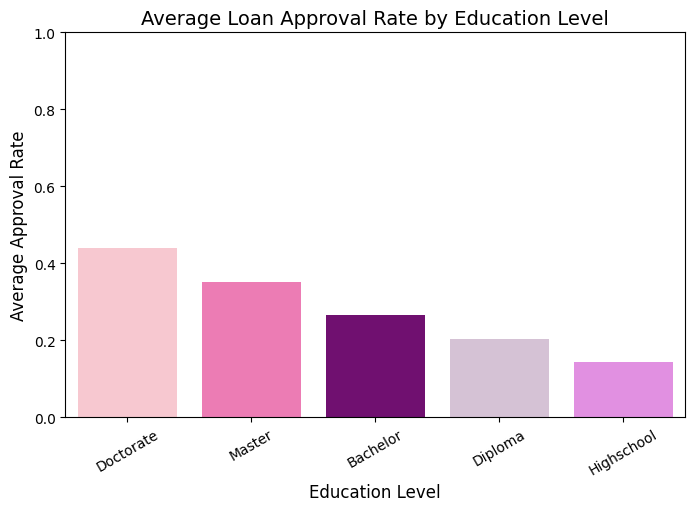

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Binary Encoding LoanApproved
df['LoanApproved_num'] = df['LoanApproved'].replace({'Yes': 1, 'No': 0})

# Calculate average approval rate per EducationLevel
approval_by_edu = df.groupby('EducationLevel')['LoanApproved_num'].mean().sort_values(ascending=False)

# plotting figure
plt.figure(figsize=(8,5))

# Create a barplot
sns.barplot(
    x=approval_by_edu.index,      # Education levels
    y=approval_by_edu.values,     # Average approval rate
    palette=['pink', 'hotpink', 'purple', '#D8BFD8', 'violet']
)

# Add titles and labels
plt.title("Average Loan Approval Rate by Education Level", fontsize=14)
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Average Approval Rate", fontsize=12)
plt.ylim(0, 1)

# Rotate x labels for readability if needed
plt.xticks(rotation=30)

# Show plot
plt.show()

**Answer for Q1**: Since we are comparing categorical data (EducationLevel) against a numeric metric (approval rate), we will be using a bar chart. Each bar represents an education level, and the height of the bar represents the average loan approval rate. The Doctorate (EducationLevel) has the highest approval rate.


**Q2: How does the annual income vary among approved applicants? Interpret the values of the 3 quartiles.**

**Visualization**

**Answer for Q2**: Your answer here

**Q3: How does the age of an applicant affect their credit score? (Hint: Use the line of best fit.)**

**Visualization**

**Answer for Q3**: Your answer here

**Q4: Is the distribution of applicants' income per month normal or skewed?**

**Visualization**

**Answer for Q4**: Your answer here

## Data Preparation for Modelling

## Modelling

## Evaluation

## Bonus (Optional)